In [88]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib import rc, animation
from IPython.display import HTML
rc('animation', html='html5')
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_style('white')
import pandas as pd
%matplotlib inline

random_state = 1729

# import data from csv
dataframe = pandas.read_csv('Scoring.csv',usecols = range(0,19), engine='python')
X = dataframe.values

# Initialize Dictionaries and Lists
players2008 = {}
players2009 = {}
players2010 = {}
players2011 = {}
players_2008 = []
players_2009 = []
players_2010 = []
players_2011 = []

#Find players who have played in 2008-2011 seasons at least half of the season
for i in X:
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2008) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2008:
            players2008[i[0]] += 1
        else:
            players2008[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2009) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2009:
            players2009[i[0]] += 1
        else:
            players2009[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2010) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2010:
            players2010[i[0]] += 1
        else:
            players2010[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2011) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2011:
            players2011[i[0]] += 1
        else:
            players2011[i[0]] = 1


# Remove players who have multiple team appearances in a season
for i in players2008.keys():
    if players2008[i] > 1:
        del players2008[i]
for i in players2009.keys():
    if players2009[i] > 1:
        del players2009[i]
for i in players2010.keys():
    if players2010[i] > 1:
        del players2010[i]
for i in players2011.keys():
    if players2011[i] > 1:
        del players2011[i]     

#Add players to lists if they have played in all three seasons
for i in X:
    if ((i[0] in players2008) and (i[0] in players2009) and (i[0] in players2010) and (i[0] in players2011)) and (i[6]>41 and i[6] != 'nan'):
        if (i[1] == 2008):
            players_2008.append(i)
        if (i[1] == 2009):
            players_2009.append(i)
        if (i[1] == 2010):
            players_2010.append(i)
        if (i[1] == 2011):
            players_2011.append(i)



In [89]:
# # G = 6, A = 4, SOG = 1, PPP =1
# # Calculate the total fantasy points scored 2008 (feature data) - normalized to make points per game
# X1_2008 = []
# X2_2008 = []
# X3_2008 = []
# X4_2008 = []

# for players in players_2008:
#     X1_2008.append(players[7]*6/players[6])
#     X2_2008.append(players[8]*4/players[6])
#     X3_2008.append(players[18]/players[6])
#     X4_2008.append((players[12]+players[13])/players[6])

# # Calculate target data from 2008 - normalized to make points per game
# Y_2008 = []

# for players in players_2008:
#     Y_2008.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# # Calculate the total fantasy points scored 2009 (feature data) - normalized to make points per game
# X1_2009 = []
# X2_2009 = []
# X3_2009 = []
# X4_2009 = []

# for players in players_2009:
#     X1_2009.append(players[7]*6/players[6])
#     X2_2009.append(players[8]*4/players[6])
#     X3_2009.append(players[18]/players[6])
#     X4_2009.append((players[12]+players[13])/players[6])

# # Calculate target data from 2009 - normalized to make points per game
# Y_2009 = []

# for players in players_2009:
#     Y_2009.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# # Calculate the total fantasy points scored 2010 (feature data) - normalized to make points per game
# X1_2010 = []
# X2_2010 = []
# X3_2010 = []
# X4_2010 = []

# for players in players_2010:
#     X1_2010.append(players[7]*6/players[6])
#     X2_2010.append(players[8]*4/players[6])
#     X3_2010.append(players[18]/players[6])
#     X4_2010.append((players[12]+players[13])/players[6])

# # Calculate target data from 2010 - normalized to make points per game
# Y_2010 = []

# for players in players_2010:
#     Y_2010.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# # Calculate the total fantasy points scored 2011 (feature data) - normalized to make points per game
# X1_2011 = []
# X2_2011 = []
# X3_2011 = []
# X4_2011 = []

# for players in players_2011:
#     X1_2011.append(players[7]*6/players[6])
#     X2_2011.append(players[8]*4/players[6])
#     X3_2011.append(players[18]/players[6])
#     X4_2011.append((players[12]+players[13])/players[6])

# # Calculate target data from 2009 - normalized to make points per game
# Y_2011 = []

# for players in players_2011:
#     Y_2011.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))




In [90]:
# # Create set of observations
# X_2008 = []
# X_2009 = []
# X_2010 = []
# X_2011 = []

# for i in xrange(len(X1_2008)):
#     X_2008.append([X1_2008[i], X2_2008[i], X3_2008[i], X4_2008[i]])
#     X_2009.append([X1_2009[i], X2_2009[i], X3_2009[i], X4_2009[i]])
#     X_2010.append([X1_2010[i], X2_2010[i], X3_2010[i], X4_2010[i]])
#     X_2011.append([X1_2011[i], X2_2011[i], X3_2011[i], X4_2011[i]])

In [91]:
X_2008 = []
X_2009 = []
X_2010 = []
X_2011 = []

for i in players_2008:
    X_2008.append(i[6:19])
X_2008 = np.delete(X_2008,[3,4,8,9,10,11],1)

for i in players_2009:
    X_2009.append(i[6:19])
X_2009 = np.delete(X_2009,[3,4,8,9,10,11],1)

for i in players_2010:
    X_2010.append(i[6:19])
X_2010 = np.delete(X_2010,[3,4,8,9,10,11],1)

for i in players_2011:
    X_2011.append(i[6:19])
X_2011 = np.delete(X_2011,[3,4,8,9,10,11],1)

# Calculate target data from 2009
Y_2009 = []

for players in players_2009:
    Y_2009.append((players[7]*6)+(players[8]*4)+(players[18])+(players[12]+players[13]))

# Calculate target data from 2010
Y_2010 = []

for players in players_2010:
    Y_2010.append((players[7]*6)+(players[8]*4)+(players[18])+(players[12]+players[13]))

Stats = []
for i in X_2008:
    Stats.append(i)
for i in X_2009:
    Stats.append(i)

Y = Y_2009 + Y_2010
Stats = np.array(Stats)

# print Stats[0]
# print Stats[1]
# print Stats[:, 2]

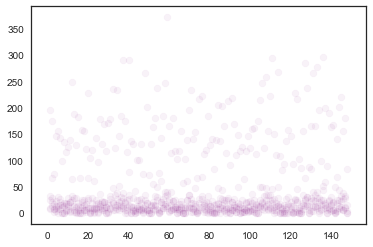

In [101]:
## Plot data
import matplotlib.pyplot as plt

x_axis = range(1,len(Y)+1)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(x_axis, Stats[:,0], color='purple', label='Games', alpha='0.05')
ax.scatter(x_axis, Stats[:,1], color='purple', label='Goals', alpha='0.05')
ax.scatter(x_axis, Stats[:,2], color='purple', label='Assists', alpha='0.05')
# ax.scatter(x_axis, Stats[:,3], color='purple', label='+/-', alpha='0.05')
ax.scatter(x_axis, Stats[:,4], color='purple', label='PPG', alpha='0.05')
ax.scatter(x_axis, Stats[:,5], color='purple', label='PPA', alpha='0.05')
ax.scatter(x_axis, Stats[:,6], color='purple', label='SOG', alpha='0.05')
# plt.legend(loc='upper left');
plt.show()

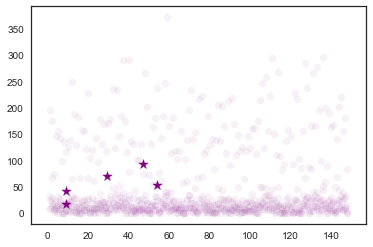

In [102]:
# Initialize clusters

n_centers = 5
fig, ax = plt.subplots()
# ax.scatter(x_axis, Stats[:,0], color='purple', label='Games', alpha='0.05')
ax.scatter(x_axis, Stats[:,1], color='purple', label='Goals', alpha='0.05')
ax.scatter(x_axis, Stats[:,2], color='purple', label='Assists', alpha='0.05')
# ax.scatter(x_axis, Stats[:,3], color='purple', label='+/-', alpha='0.05')
ax.scatter(x_axis, Stats[:,4], color='purple', label='PPG', alpha='0.05')
ax.scatter(x_axis, Stats[:,5], color='purple', label='PPA', alpha='0.05')
ax.scatter(x_axis, Stats[:,6], color='purple', label='SOG', alpha='0.05')
init_data = 100*np.random.rand(n_centers, 100)
scatr = ax.scatter(init_data[:, 0], init_data[:, 1], 
                   marker="*", s=100, color='purple', animated=True)


In [103]:
# def init():
#     return scatr,

# def animate(i):
#     if i == 0:
#         scatr.set_offsets(init_data)
#         scatr.set_color('black')
#     else:
#         kmns = KMeans(n_clusters=n_centers, random_state=random_state, 
#                       max_iter=i)
#         kmns.fit(X)
#         scatr.set_offsets(kmns.cluster_centers_)
#         scatr.set_color('blue')
#     return scatr,
    
# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=5, 
#                                interval=1000, blit=True)


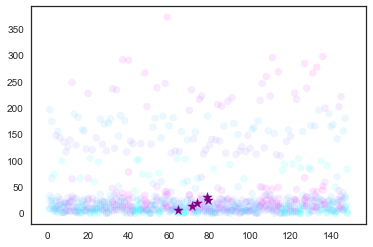

In [104]:
kmns = KMeans(n_clusters=n_centers, random_state=random_state)
kmns.fit(Stats)
# plt.scatter(x_axis, Stats[:,0], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(x_axis, Stats[:,1], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(x_axis, Stats[:,2], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
# plt.scatter(x_axis, Stats[:,3], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(x_axis, Stats[:,4], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(x_axis, Stats[:,5], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(x_axis, Stats[:,6], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(kmns.cluster_centers_[:, 0], kmns.cluster_centers_[:, 1], 
            marker='*', s=100, color='purple')